In [2]:
import pandas as pd
df=pd.read_csv('house_price.csv')
df.head(20)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [3]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)
print(df.total_sqft.median())
pd.set_option('display.float_format', lambda x:'%2f' % x)

(13200, 7)
Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07
location           ob

In [4]:
df.drop('size',axis=1,inplace=True)

In [5]:
print(df.price_per_sqft.describe())

count      13200.000000
mean        7920.336742
std       106727.160328
min          267.000000
25%         4267.000000
50%         5438.000000
75%         7317.000000
max     12000000.000000
Name: price_per_sqft, dtype: float64


# outliners

**mean and standard deviation method**

In [20]:
mean=df['price_per_sqft'].mean()
median=df['price_per_sqft'].median()
std=df['price_per_sqft'].std()

print(mean)
print(median)
print(std)

minbound=mean-3*std
maxbound=mean+3*std
print(minbound)
print(maxbound)
outliners=df[(df['price_per_sqft']<minbound)
                 | (df['price_per_sqft']>maxbound)]
print('outliners\n' + '*' * 40)
print(outliners)


nonoutliners=df[(df['price_per_sqft']>minbound)
                  & (df['price_per_sqft']<maxbound)]
print('-' * 40)
print('nonoutliners\n' + '*' * 40)
print(nonoutliners)

7920.336742424242
5438.0
106727.16032810845
-312261.1442419011
328101.8177267496
outliners
****************************************
             location  total_sqft     bath      price  bhk  price_per_sqft
345             other   11.000000 3.000000  74.000000    3          672727
1106            other   24.000000 2.000000 150.000000    5          625000
4044   Sarjapur  Road    1.000000 4.000000 120.000000    4        12000000
4924            other    5.000000 7.000000 115.000000    7         2300000
11447      Whitefield   60.000000 4.000000 218.000000    4          363333
----------------------------------------
nonoutliners
****************************************
                       location  total_sqft     bath      price  bhk  \
0      Electronic City Phase II 1056.000000 2.000000  39.070000    2   
1              Chikka Tirupathi 2600.000000 5.000000 120.000000    4   
2                   Uttarahalli 1440.000000 2.000000  62.000000    3   
3            Lingadheeranahalli 152

**percentile method**

In [21]:
lowerlimit=df['price_per_sqft'].quantile(0.05)
upperlimit=df['price_per_sqft'].quantile(0.95)
print(lowerlimit)
print(upperlimit)

P_outliners=df[(df['price_per_sqft']<=lowerlimit)
                 | (df['price_per_sqft']>=upperlimit)]
print('outliners\n' + '*' * 40)
print(P_outliners)

P_nonoutliners=df[(df['price_per_sqft'] >=lowerlimit)
                 & (df['price_per_sqft'] <=upperlimit)]
print('-' * 40)
print('nonoutliners\n' + '*' * 40)
print(P_nonoutliners)

3107.8500000000004
15312.099999999984
outliners
****************************************
               location  total_sqft     bath      price  bhk  price_per_sqft
7          Rajaji Nagar 3300.000000 4.000000 600.000000    4           18181
9                 other 1020.000000 6.000000 370.000000    6           36274
20              Kengeri  600.000000 1.000000  15.000000    1            2500
41       Sarjapur  Road 1254.000000 3.000000  38.000000    3            3030
45           HSR Layout  600.000000 9.000000 200.000000    8           33333
...                 ...         ...      ...        ...  ...             ...
13157             other 1400.000000 7.000000 218.000000    7           15571
13185          Hulimavu  500.000000 1.000000 220.000000    1           44000
13186             other 1200.000000 5.000000 325.000000    4           27083
13191  Ramamurthy Nagar 1500.000000 9.000000 250.000000    7           16666
13199      Doddathoguru  550.000000 1.000000  17.000000    1    

**z score method**

In [22]:
from scipy.stats import zscore

In [23]:
ZScore=zscore(df['price_per_sqft'])
print(ZScore)

0       -0.039554
1       -0.030971
2       -0.033876
3       -0.015698
4       -0.034391
           ...   
13195   -0.011538
13196    0.029897
13197   -0.024946
13198    0.023300
13199   -0.045260
Name: price_per_sqft, Length: 13200, dtype: float64


In [24]:
z_Outliners=df[(ZScore <-3 ) | (ZScore >3)]
z_nonoutliners=df[(ZScore >-3 ) & (ZScore <3)]

In [26]:

print('outliners\n' + '*' * 40)
print(z_Outliners)

print('-' * 40)

print('nonoutliners\n' + '*' * 40)
print(z_nonoutliners)

outliners
****************************************
             location  total_sqft     bath      price  bhk  price_per_sqft
345             other   11.000000 3.000000  74.000000    3          672727
1106            other   24.000000 2.000000 150.000000    5          625000
4044   Sarjapur  Road    1.000000 4.000000 120.000000    4        12000000
4924            other    5.000000 7.000000 115.000000    7         2300000
11447      Whitefield   60.000000 4.000000 218.000000    4          363333
----------------------------------------
nonoutliners
****************************************
                       location  total_sqft     bath      price  bhk  \
0      Electronic City Phase II 1056.000000 2.000000  39.070000    2   
1              Chikka Tirupathi 2600.000000 5.000000 120.000000    4   
2                   Uttarahalli 1440.000000 2.000000  62.000000    3   
3            Lingadheeranahalli 1521.000000 3.000000  95.000000    3   
4                      Kothanur 1200.000000 

**IQR method**

In [30]:
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
print(Q1)
print(Q3)
IQR=Q3-Q1
print(IQR)


Lbound=Q1-1.5*IQR
Ubound=Q3+1.5*IQR

print(Lbound)
print(Ubound)

I_outliners=df[(df['price_per_sqft']<=Lbound)
                 | (df['price_per_sqft'] >=Ubound)]
print('outliners',I_outliners)

I_nonoutliners=df[(df['price_per_sqft'] >=Lbound)
                 & (df['price_per_sqft'] <=Ubound)]
print('nonoutliners',I_nonoutliners)




4267.0
7317.0
3050.0
-308.0
11892.0
outliners                location  total_sqft     bath      price  bhk  price_per_sqft
7          Rajaji Nagar 3300.000000 4.000000 600.000000    4           18181
9                 other 1020.000000 6.000000 370.000000    6           36274
22          Thanisandra 2800.000000 5.000000 380.000000    4           13571
45           HSR Layout  600.000000 9.000000 200.000000    8           33333
48             KR Puram  800.000000 1.000000 130.000000    2           16250
...                 ...         ...      ...        ...  ...             ...
13142             other 1140.000000 1.000000 185.000000    2           16228
13157             other 1400.000000 7.000000 218.000000    7           15571
13185          Hulimavu  500.000000 1.000000 220.000000    1           44000
13186             other 1200.000000 5.000000 325.000000    4           27083
13191  Ramamurthy Nagar 1500.000000 9.000000 250.000000    7           16666

[1265 rows x 6 columns]
nonou

# Comparison of Outlier Removal Methods

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

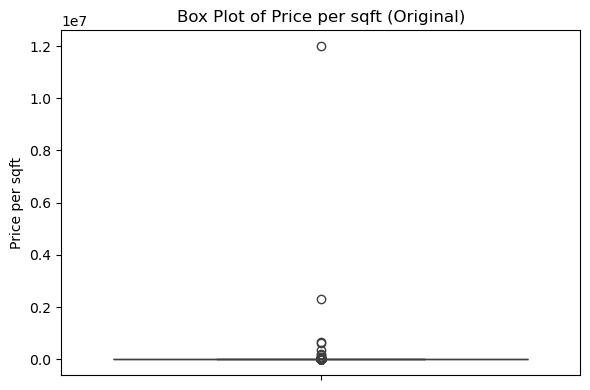

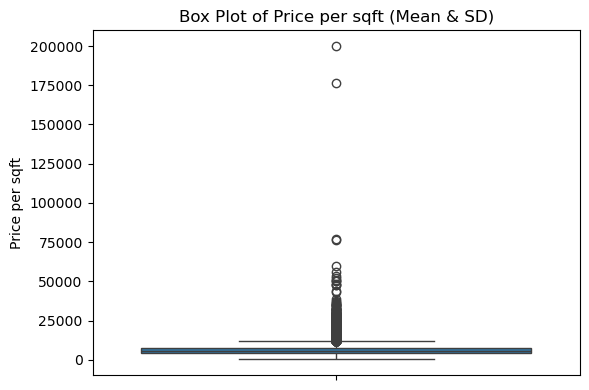

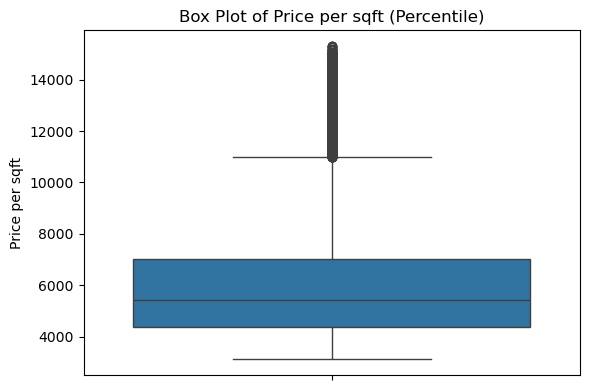

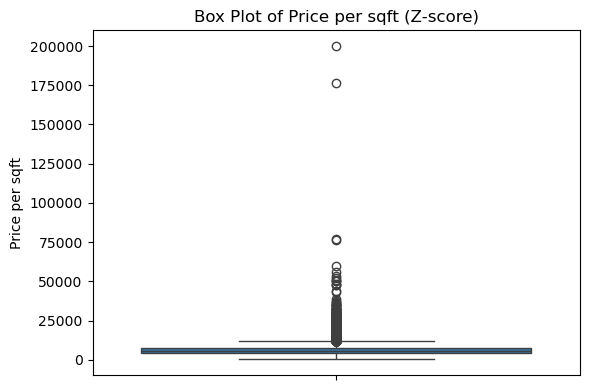

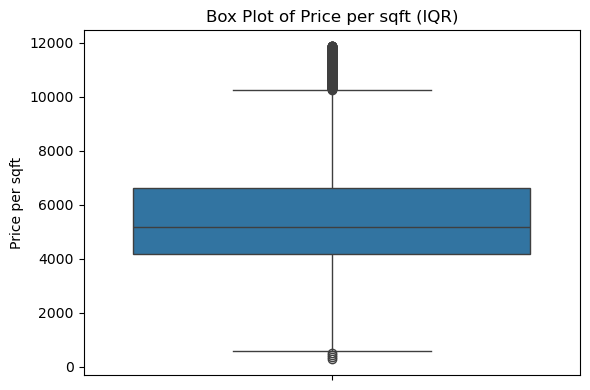

In [31]:
data_to_plot = {
    'Original': df['price_per_sqft'],
    'Mean & SD': nonoutliners['price_per_sqft'],
    'Percentile': P_nonoutliners['price_per_sqft'],
    'Z-score': z_nonoutliners['price_per_sqft'],
    'IQR': I_nonoutliners['price_per_sqft']
}

for method, data in data_to_plot.items():
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.boxplot(y=data)
    plt.title(f'Box Plot of Price per sqft ({method})')
    plt.ylabel('Price per sqft')
    plt.tight_layout()
    plt.show()

**ALL IN ONE**

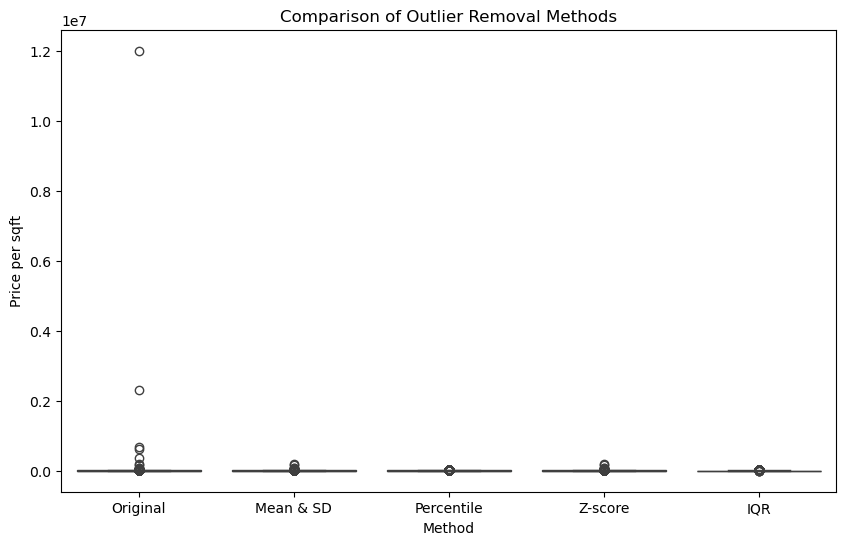

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_to_plot_df = pd.DataFrame({
    'Method': ['Original'] * len(df),
    'Price per sqft': df['price_per_sqft']
})

data_to_plot_df = pd.concat([
    data_to_plot_df,
    pd.DataFrame({'Method': ['Mean & SD'] * len(nonoutliners), 'Price per sqft': nonoutliners['price_per_sqft']}),
    pd.DataFrame({'Method': ['Percentile'] * len(P_nonoutliners), 'Price per sqft': P_nonoutliners['price_per_sqft']}),
    pd.DataFrame({'Method': ['Z-score'] * len(z_nonoutliners), 'Price per sqft': z_nonoutliners['price_per_sqft']}),
    pd.DataFrame({'Method': ['IQR'] * len(I_nonoutliners), 'Price per sqft': I_nonoutliners['price_per_sqft']})
])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='Price per sqft', data=data_to_plot_df)
plt.title("Comparison of Outlier Removal Methods")
plt.ylabel('Price per sqft')
plt.show()

In [ ]:
since  data ('price_per_sqft') is highly skewed, the IQR (Interquartile Range) and Percentile methods are generally better and more reliable choices for identifying outliers compared to the Z-score and Mean & Standard Deviation methods.

# histogram to check normality.

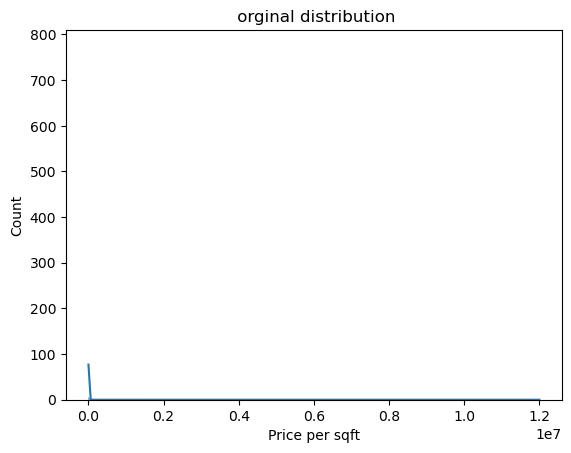

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
sns.histplot(df['price_per_sqft'],kde=True)
plt.title(" orginal distribution")
plt.xlabel("Price per sqft")      
plt.ylabel("Count")
plt.show()

print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

RESULT: POSTIVE SKWENESS AND POSTIVE KURTOSIS . THERE IS A  SHARP SKWENESS AND THE TAIL EXTEND TOWARDS RIGHT SIDE.THE DATA IS NOT A NORMAL DISTRIBUTION.
Most of the  prices are clustred in the lower price range,and some extream outliners with high price range are there.

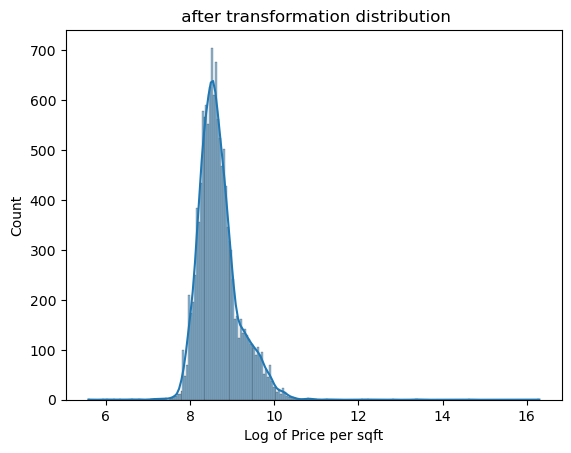

Skewness transformed: 1.3997035748119977
Kurtosis transformed: 9.199636085376468


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis

df['price_per_sqft_transformed'] = np.log(df['price_per_sqft'])
sns.histplot(df['price_per_sqft_transformed'], kde=True)
plt.title(" after transformation distribution")
plt.xlabel("Log of Price per sqft")      
plt.ylabel("Count")
plt.show()

print("Skewness transformed:", skew(df['price_per_sqft_transformed']))
print("Kurtosis transformed:", kurtosis(df['price_per_sqft_transformed']))




In [ ]:
 RESULT:TRNAFORMATON USING LOG TO ADJUST tHE SCALE AND MAKE THE SKWED DATA MORE NORMAL.SKWENESS AND CURTOSIS IS REDUCED.

**HeatMap to check correlation between numerical columns**

       total_sqft     bath      price  bhk  price_per_sqft
0     1056.000000 2.000000  39.070000    2            3699
1     2600.000000 5.000000 120.000000    4            4615
2     1440.000000 2.000000  62.000000    3            4305
3     1521.000000 3.000000  95.000000    3            6245
4     1200.000000 2.000000  51.000000    2            4250
...           ...      ...        ...  ...             ...
13195 3453.000000 4.000000 231.000000    5            6689
13196 3600.000000 5.000000 400.000000    4           11111
13197 1141.000000 2.000000  60.000000    2            5258
13198 4689.000000 4.000000 488.000000    4           10407
13199  550.000000 1.000000  17.000000    1            3090

[13200 rows x 5 columns]
                total_sqft     bath    price      bhk  price_per_sqft
total_sqft        1.000000 0.392743 0.574330 0.346013       -0.008267
bath              0.392743 1.000000 0.455998 0.897951        0.030883
price             0.574330 0.455998 1.000000 0.396883   

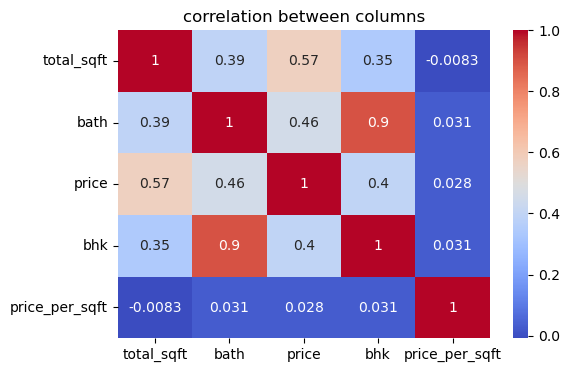

In [68]:
import pandas as pd
import seaborn as sns
columns=df.select_dtypes(include='number')
print(columns)

correlation=columns.corr()
print(correlation)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("correlation between columns")

plt.show()

In [ ]:
RESULT:The number of bathrooms is strongly linked to the number of bedrooms(0.9 close to +1), and the total size of a property has a moderate to strong positive correlation with its price(0.57). However, the price per square feet shows a very weak linear relationship with other listed features like total size, number of bathrooms, overall price, and number of bedrooms(very close to 0)
so total sqft,number of bathrooms and bhk is affecting the total price.
price per sqft is not having significant mapct on price of the house property.

**scatter scatter plot between totalsqft and price per sqftplot between totalsqft and price per sqft.**

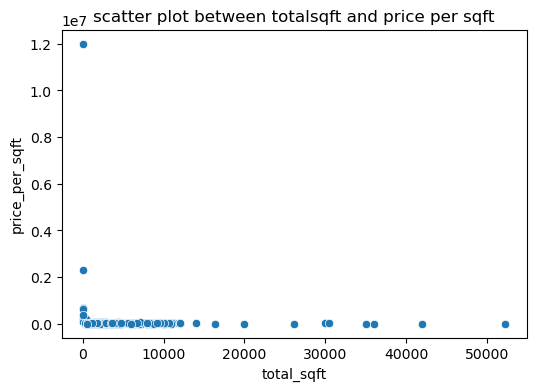

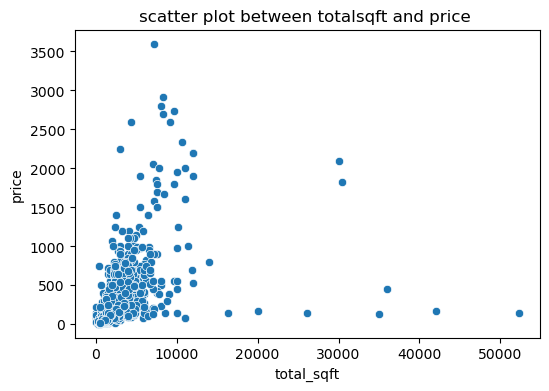

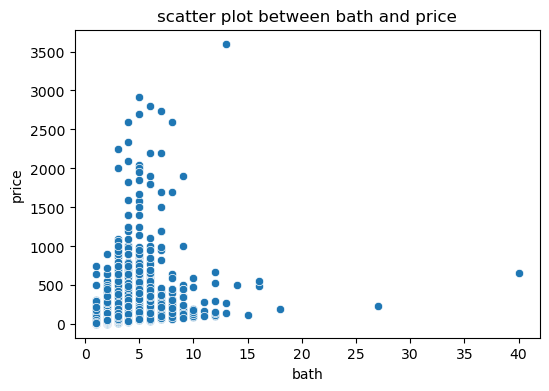

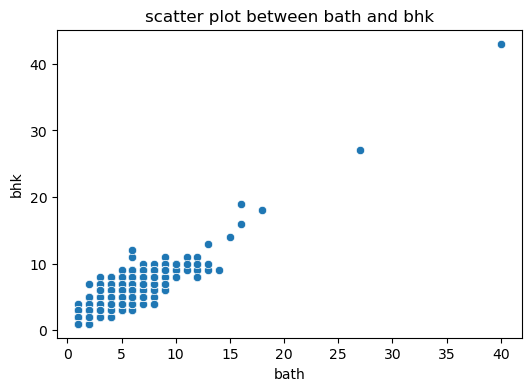

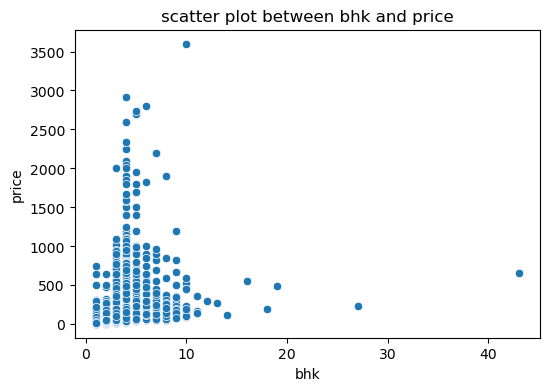

In [39]:
import pandas as pd
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_sqft',y='price_per_sqft',data=df)
plt.title("scatter plot between totalsqft and price per sqft")

plt.show()



plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_sqft',y='price',data=df)
plt.title("scatter plot between totalsqft and price ")

plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(x='bath',y='price',data=df)
plt.title("scatter plot between bath and price")

plt.show()



plt.figure(figsize=(6, 4))
sns.scatterplot(x='bath',y='bhk',data=df)
plt.title("scatter plot between bath and bhk")

plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(x='bhk',y='price',data=df)
plt.title("scatter plot between bhk and price")

plt.show()







In [ ]:
RESULT: THER IS A NEGATIVE CORRELATION BETWEEN BETWEEN TOTAL SQFT AND PRICE PER SQFT.
    
Properties with very small total square feet tend to have a very high price per square feet.
The majority of the data points are concentrated in the lower range of 'total_sqft'.
properties with large sqft tends to have lower price per sqft but it is not strong,some fluctuations are there. .so the correlation is weak negative correlation.